<a href="https://colab.research.google.com/github/nishifwd/machine-learning/blob/main/FYP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Dataset.csv")

In [3]:
data.head() #First five rows

,WaterbodyName,Years,SampleDate,Alkalinity-total (as CaCO3),Ammonia-Total (as N),BOD - 5 days (Total),Chloride,Conductivity @25°C,Dissolved Oxygen,ortho-Phosphate (as P) - unspecified,pH,Temperature,Total Hardness (as CaCO3),True Colour,WQI Value,Label
0,LEE (CORK)_020,2008,Jan,8.0,0.069,1.3,13.2,69.0,54.10,0.005,6.89,8.9,10.8,33.0,74.281978,Fair
1,LEE (CORK)_021,2008,Jan,9.0,0.068,1.3,14.8,77.0,54.00,0.005,6.89,9.7,11.7,28.0,74.755756,Fair
2,LEE (CORK)_022,2008,Mar,15.0,0.033,1.4,16.0,106.0,53.90,0.021,7.18,6.6,17.0,22.0,72.037731,Fair
3,LEE (CORK)_023,2008,Mar,13.0,0.040,1.2,15.7,159.0,53.35,0.005,6.88,6.4,15.0,22.0,75.465689,Fair
4,LEE (CORK)_024,2008,Mar,12.0,0.039,1.1,16.0,144.0,53.40,0.021,7.23,6.3,16.3,24.0,71.975552,Fair


In [4]:
data.tail() #Last five rows

,WaterbodyName,Years,SampleDate,Alkalinity-total (as CaCO3),Ammonia-Total (as N),BOD - 5 days (Total),Chloride,Conductivity @25°C,Dissolved Oxygen,ortho-Phosphate (as P) - unspecified,pH,Temperature,Total Hardness (as CaCO3),True Colour,WQI Value,Label
7785,LEE (CORK)_7805,2022,Jun,44.0,1.500,2.5,19.2,172.0,56.55,0.056,7.4,15.7,44.0,23.0,63.915606,Marginal
7786,LEE (CORK)_7806,2022,Sep,31.0,0.140,2.8,21.2,160.0,53.95,0.015,7.1,14.9,45.0,27.0,74.858858,Fair
7787,LEE (CORK)_7807,2022,Nov,22.0,0.190,1.5,16.2,118.0,54.30,0.021,6.9,12.3,34.0,58.0,69.188960,Fair
7788,LEE (CORK)_7808,2023,Mar,36.0,0.210,1.6,17.4,151.0,52.40,0.059,7.2,7.1,44.0,20.0,70.234195,Fair
7789,LEE (CORK)_7809,2023,Feb,82.0,0.027,1.3,24.7,324.0,50.20,0.045,7.8,8.1,121.0,5.0,75.101627,Fair


In [5]:
data.info() #How many data and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7790 entries, 0 to 7789
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   WaterbodyName                         7790 non-null   object 
 1   Years                                 7790 non-null   int64  
 2   SampleDate                            7790 non-null   object 
 3   Alkalinity-total (as CaCO3)           7790 non-null   float64
 4   Ammonia-Total (as N)                  7790 non-null   float64
 5   BOD - 5 days (Total)                  7790 non-null   float64
 6   Chloride                              7790 non-null   float64
 7   Conductivity @25°C                    7790 non-null   float64
 8   Dissolved Oxygen                      7790 non-null   float64
 9   ortho-Phosphate (as P) - unspecified  7790 non-null   float64
 10  pH                                    7790 non-null   float64
 11  Temperature      

In [6]:
# Check and remove duplicates if necessary
duplicate_rows = data.duplicated().sum()
if duplicate_rows > 0:
    print(f"Found {duplicate_rows} duplicate rows.")
    data = data.drop_duplicates()  # Remove duplicate rows
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [7]:
data.isnull().sum() #Missing Value

WaterbodyName                           0
Years                                   0
SampleDate                              0
Alkalinity-total (as CaCO3)             0
Ammonia-Total (as N)                    0
BOD - 5 days (Total)                    0
Chloride                                0
Conductivity @25°C                      0
Dissolved Oxygen                        0
ortho-Phosphate (as P) - unspecified    0
pH                                      0
Temperature                             0
Total Hardness (as CaCO3)               0
True Colour                             0
WQI Value                               0
Label                                   0
dtype: int64

In [8]:
data.describe().T  #Statitistic Summary

,count,mean,std,min,25%,50%,75%,max
Years,7790.0,2014.450834,4.875872,2007.000000,2010.000000,2015.000000,2019.000000,2023.00
Alkalinity-total (as CaCO3),7790.0,133.957712,85.426700,5.000000,56.000000,126.000000,200.000000,432.00
Ammonia-Total (as N),7790.0,0.100439,0.724418,0.000000,0.027000,0.036000,0.050000,40.00
BOD - 5 days (Total),7790.0,1.513646,0.847076,0.000000,1.200000,1.300000,1.500000,16.00
Chloride,7790.0,20.179117,21.489667,0.000000,15.300000,19.000000,22.700000,1260.00
Conductivity @25°C,7790.0,351.326893,177.361167,33.000000,210.250000,343.000000,482.000000,4200.00
Dissolved Oxygen,7790.0,62.698621,24.630241,0.000000,50.850000,55.200000,88.000000,146.00
ortho-Phosphate (as P) - unspecified,7790.0,0.035831,0.103463,-0.004000,0.014000,0.021000,0.033000,5.30
pH,7790.0,7.618501,0.497189,5.400000,7.400000,7.700000,8.000000,8.67
Temperature,7790.0,10.718747,3.847484,1.700000,7.800000,10.500000,13.600000,58.00


In [9]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:") #Separation
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['WaterbodyName', 'SampleDate', 'Label'], dtype='object')
Numerical Variables:
['Years', 'Alkalinity-total (as CaCO3)', 'Ammonia-Total (as N)', 'BOD - 5 days (Total)', 'Chloride', 'Conductivity @25°C', 'Dissolved Oxygen', 'ortho-Phosphate (as P) - unspecified', 'pH', 'Temperature', 'Total Hardness (as CaCO3)', 'True Colour', 'WQI Value']


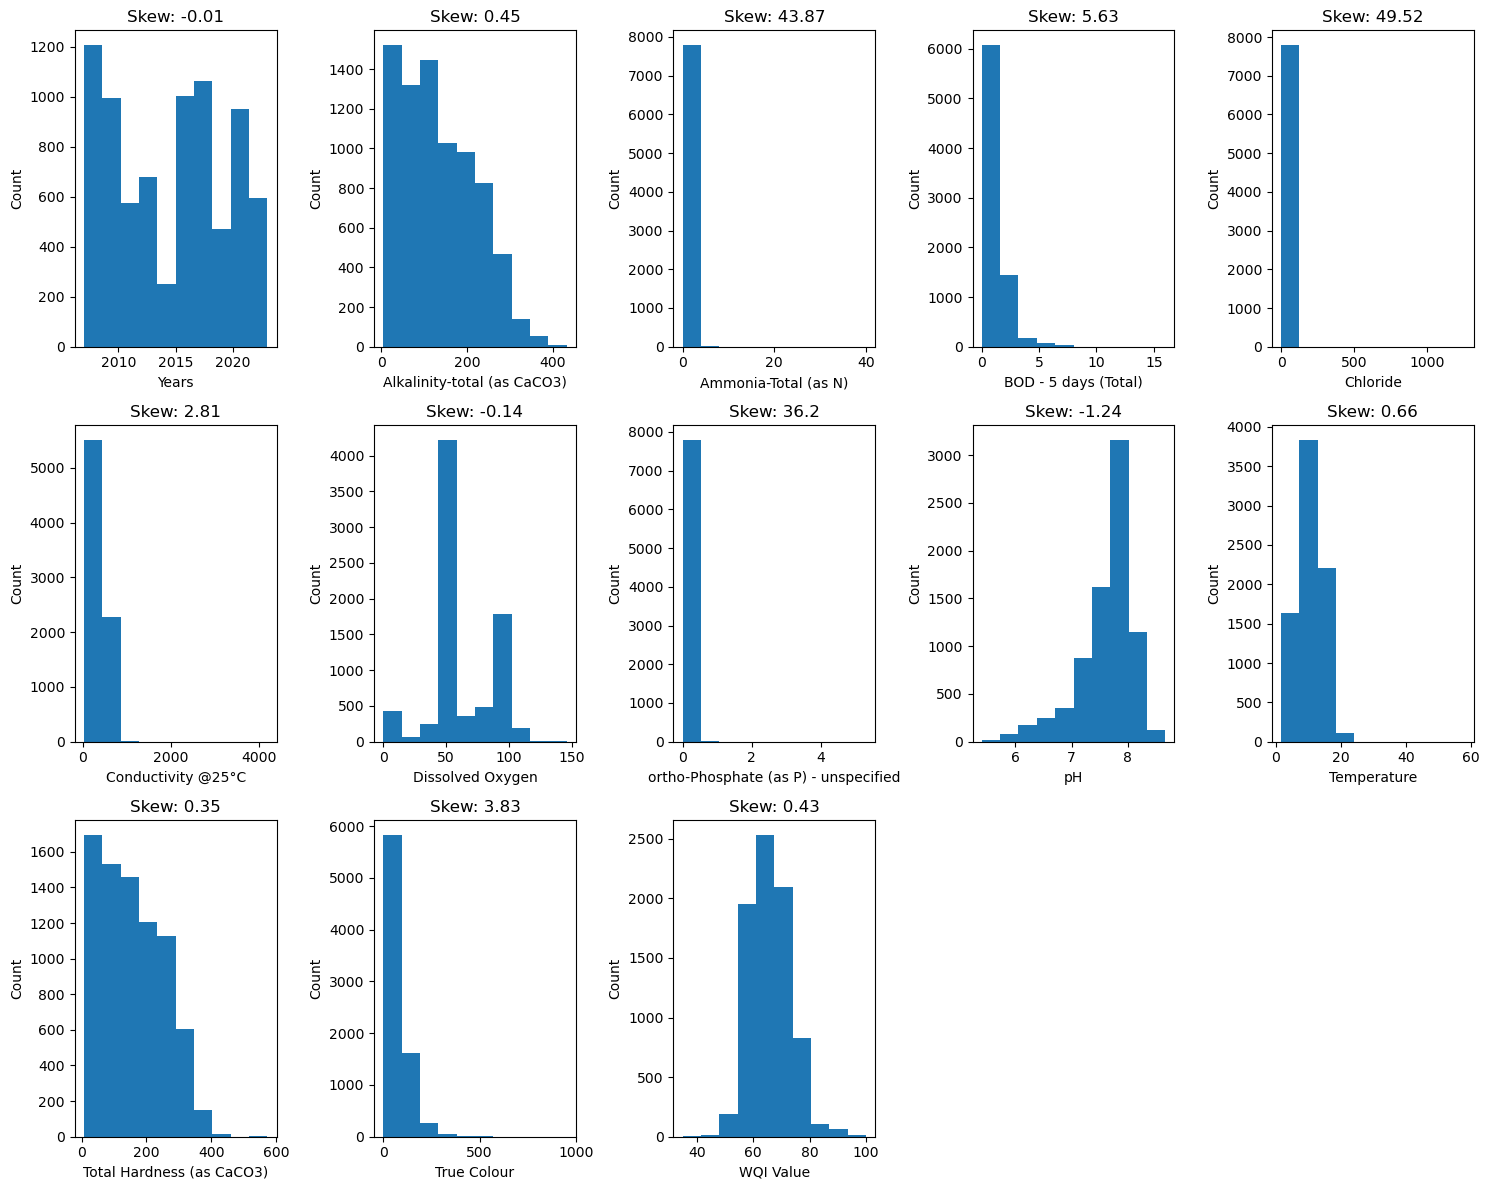

In [10]:
num_cols = data.select_dtypes(include=['number']).columns  # Ensure only numerical columns
num_per_row = 5  # Number of columns per row

# Calculate the number of rows needed
num_rows = -(-len(num_cols) // num_per_row)  # Equivalent to math.ceil(len(num_cols) / num_per_row)

plt.figure(figsize=(15, 4 * num_rows))  # Set the figure size dynamically

for i, col in enumerate(num_cols):
    plt.subplot(num_rows, num_per_row, i + 1)  # Create subplots
    data[col].hist(grid=False)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Skew: {round(data[col].skew(), 2)}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

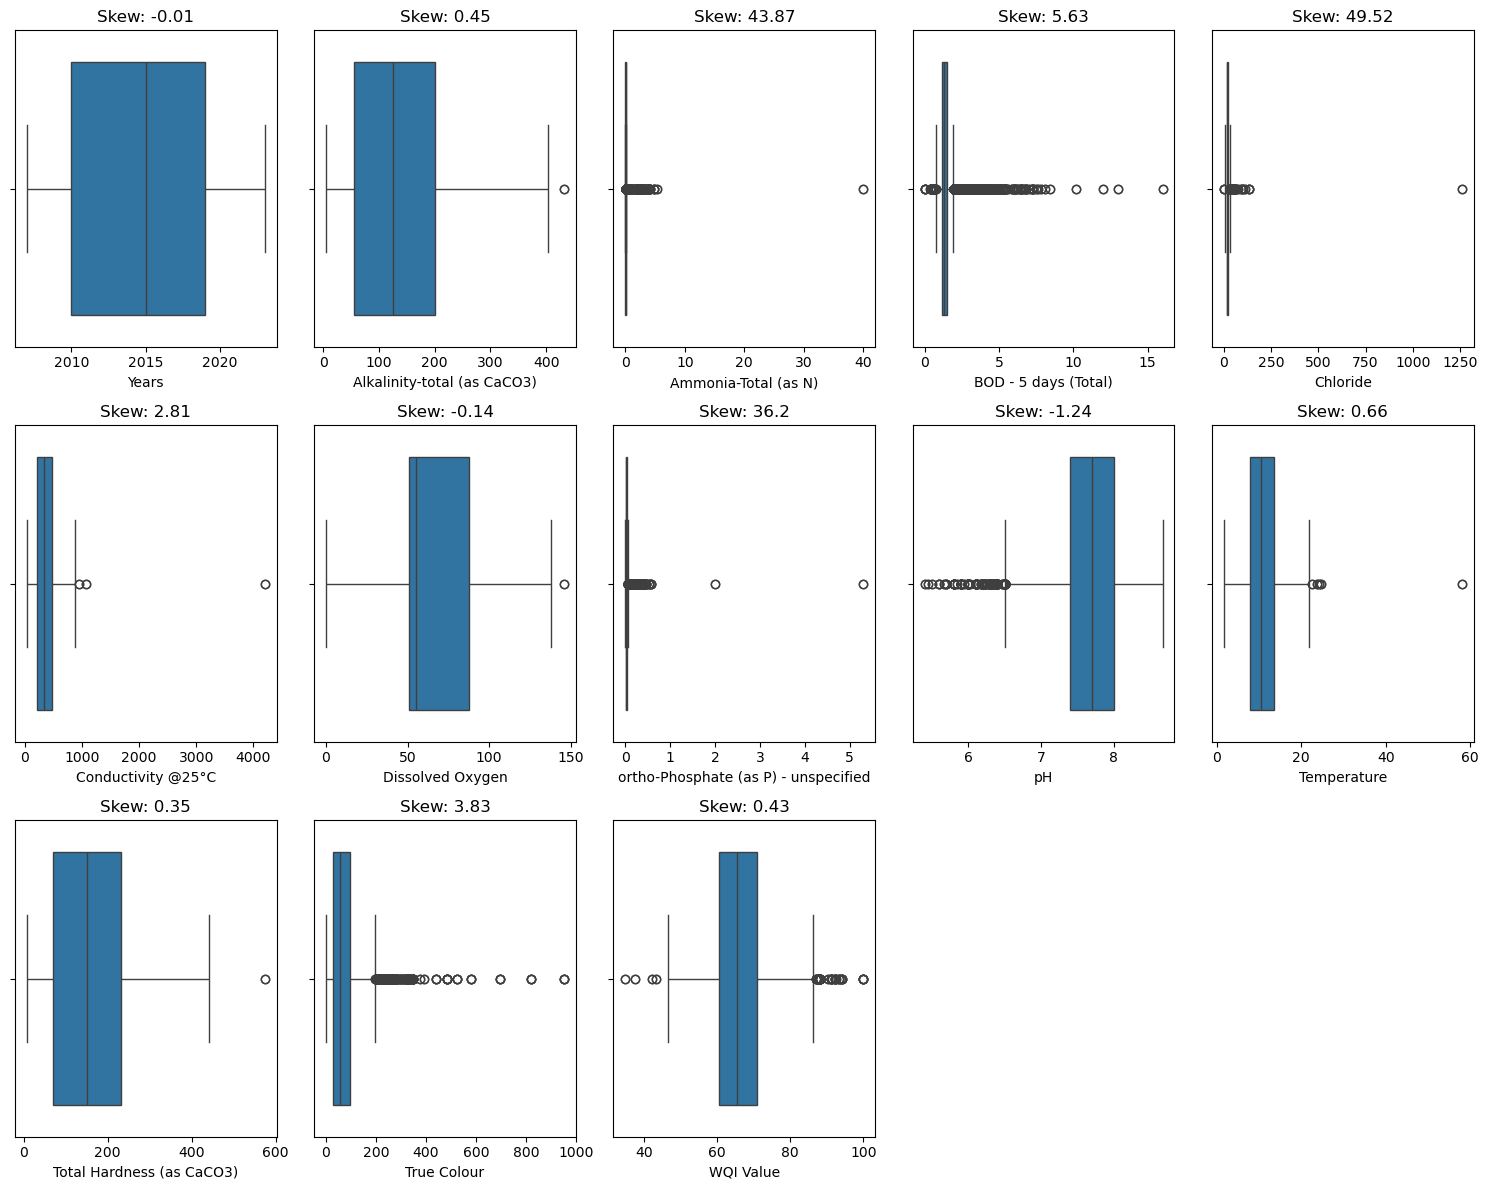

In [11]:
num_cols = data.select_dtypes(include=['number']).columns  # Ensure only numerical columns
num_per_row = 5  # Number of columns per row
num_rows = -(-len(num_cols) // num_per_row)  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_per_row, figsize=(15, 4 * num_rows))  # Single figure with subplots
axes = axes.flatten()  # Flatten the 2D array to simplify indexing

for i, col in enumerate(num_cols):
    sns.boxplot(x=data[col], ax=axes[i])  # Assign each plot to a specific subplot
    axes[i].set_xlabel(col)
    axes[i].set_title(f'Skew: {round(data[col].skew(), 2)}')

# Remove empty subplots if the number of columns is not a perfect multiple of num_per_row
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [12]:
data = data.drop(columns=['WaterbodyName', 'Years', 'SampleDate', 'Label'], errors='ignore')
df = data.copy()
for col in [c for c in data.select_dtypes(include=np.number).columns if c != 'WQI Value']:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    lower_limit = percentile25 - 1.5 * iqr
    upper_limit = percentile75 + 1.5 * iqr
    
    # Instead of removing rows, cap the values
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

# Now, 'df' contains the data with outliers removed from all numerical columns EXCEPT 'WQI Value'
print(df.shape)

(7790, 12)


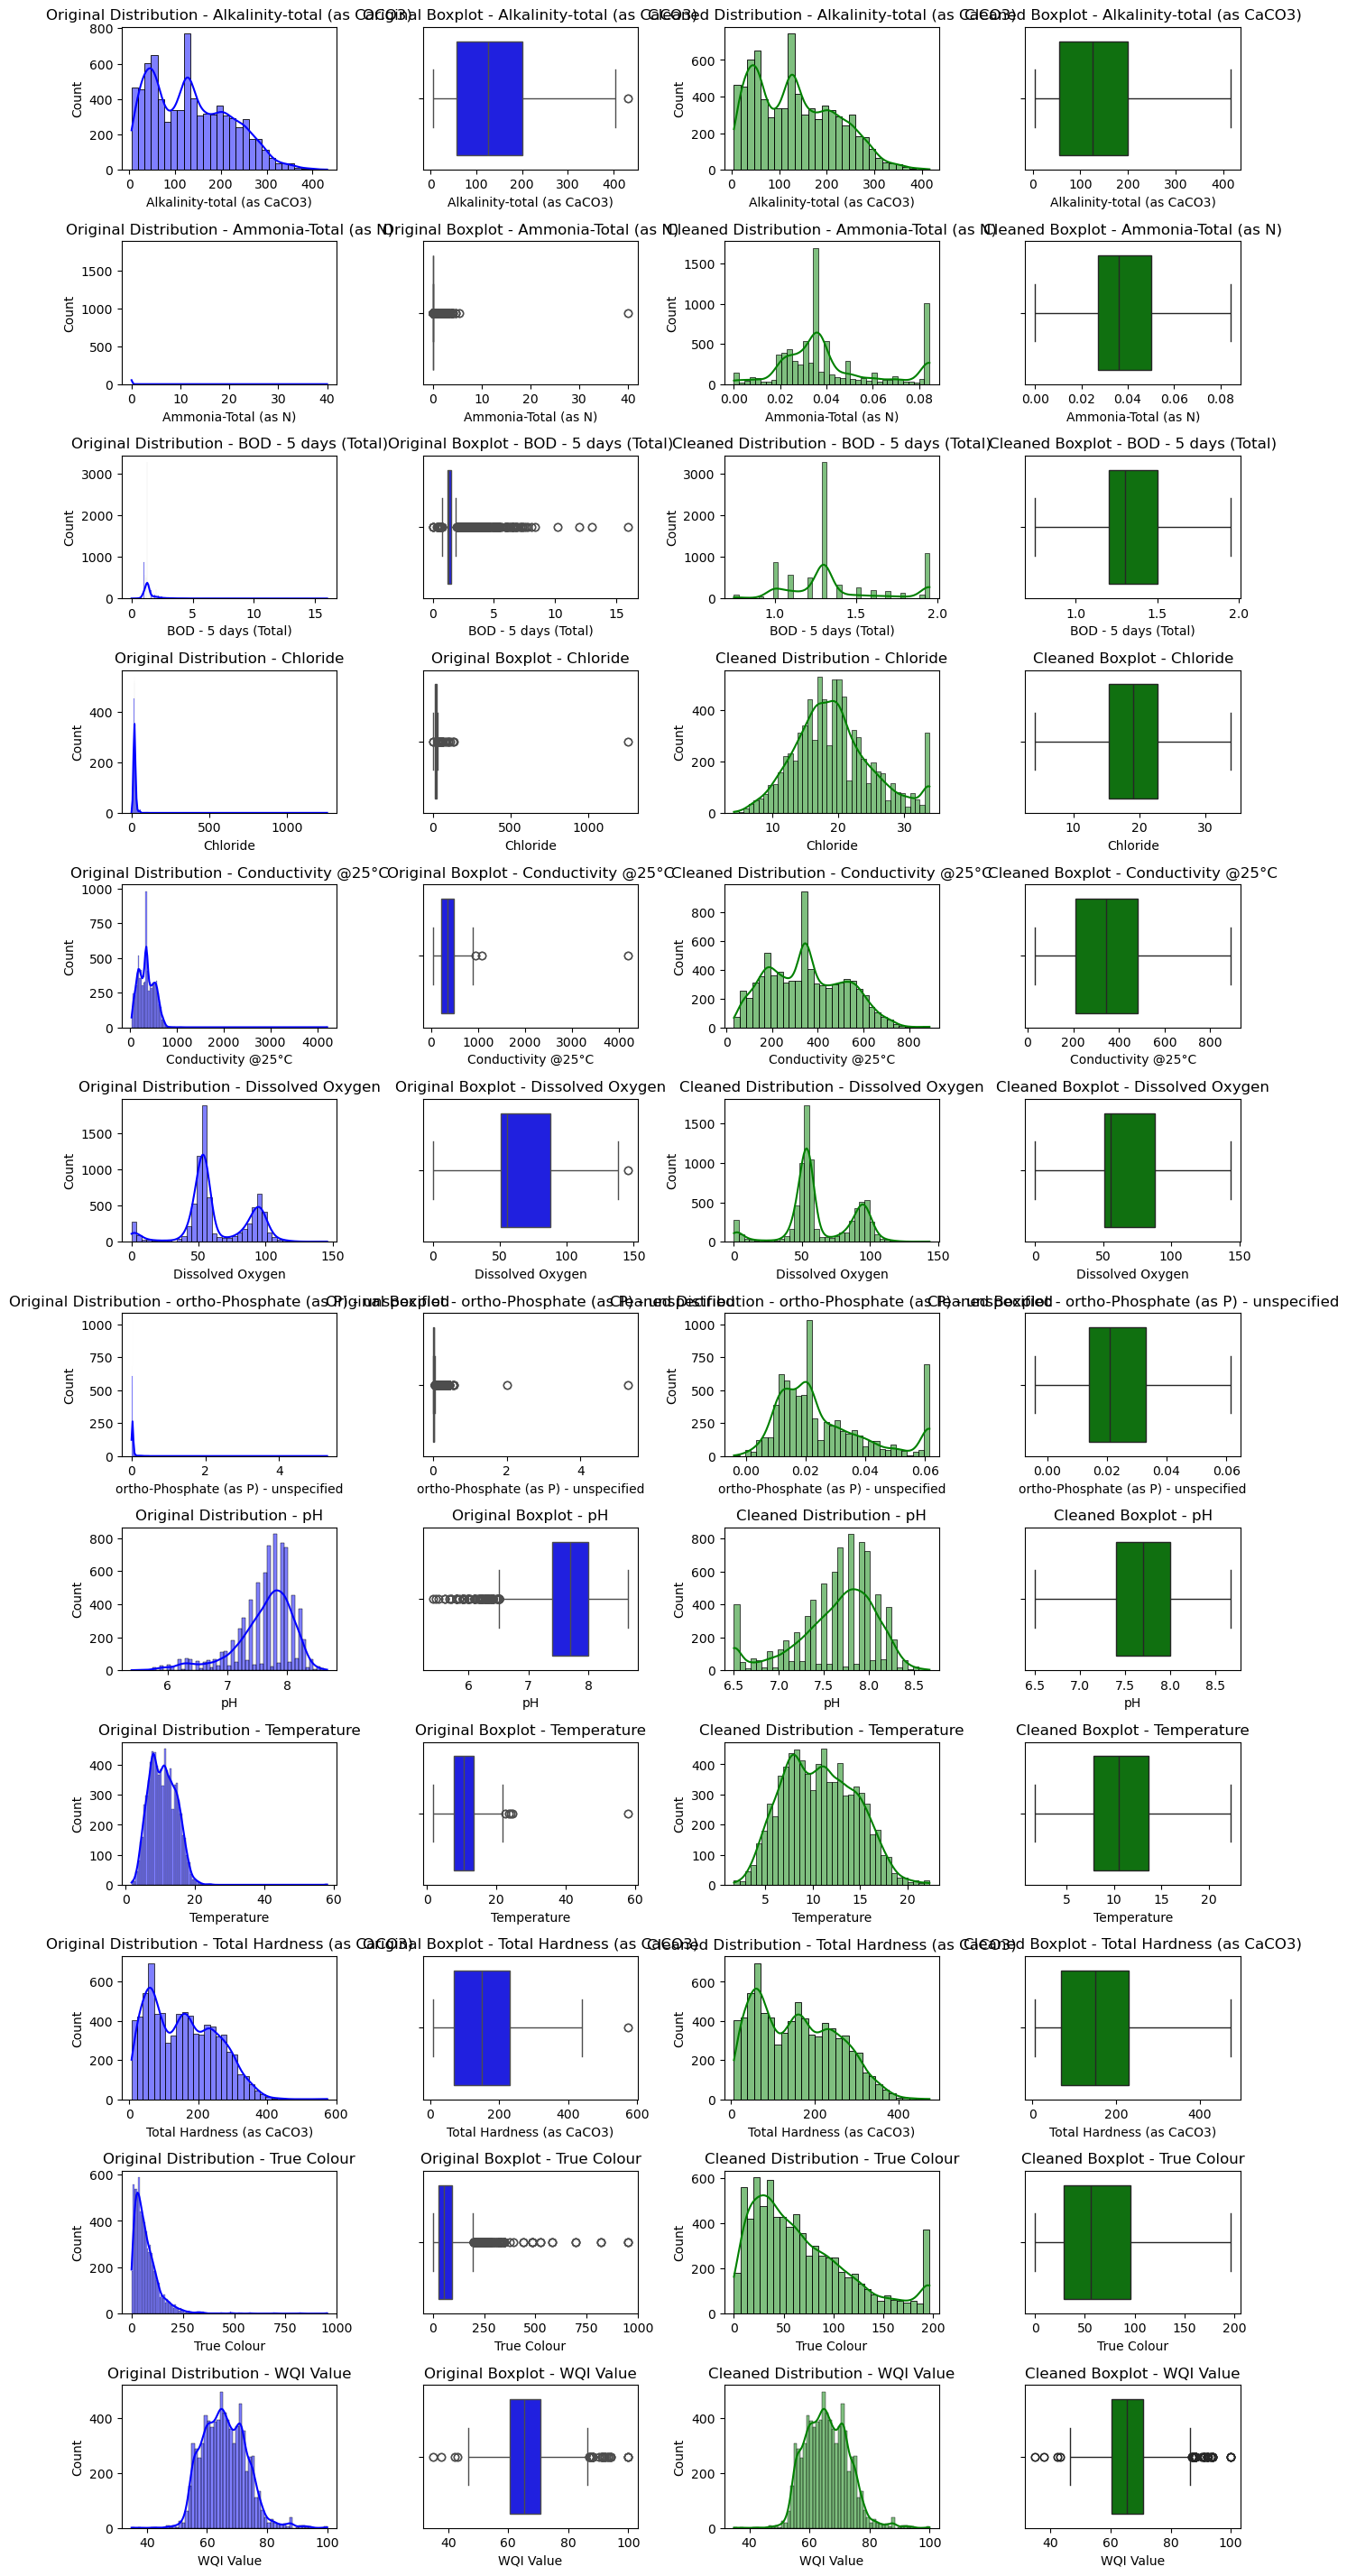

In [13]:
# Set up the figure size with more height for more subplots
plt.figure(figsize=(16, len(data.columns) * 3))

# Create subplots for each numerical column
for i, col in enumerate(data.columns, 1):  # Using data.columns directly, no need for 'numerical_columns'
    # First column: Distribution - original data
    plt.subplot(len(data.columns), 4, 4*i-3)
    sns.histplot(data[col].dropna(), kde=True, color='blue')
    plt.title(f'Original Distribution - {col}')

    # Second column: Boxplot - original data
    plt.subplot(len(data.columns), 4, 4*i-2)
    sns.boxplot(x=data[col].dropna(), color='blue')
    plt.title(f'Original Boxplot - {col}')

    # Third column: Distribution - capped data (Assumed to be in 'df')
    plt.subplot(len(data.columns), 4, 4*i-1)
    sns.histplot(df[col].dropna(), kde=True, color='green')
    plt.title(f'Cleaned Distribution - {col}')

    # Fourth column: Boxplot - capped data (Assumed to be in 'df')
    plt.subplot(len(data.columns), 4, 4*i)
    sns.boxplot(x=df[col].dropna(), color='green')
    plt.title(f'Cleaned Boxplot - {col}')

# Adjust layout manually to prevent overlap
plt.subplots_adjust(hspace=0.5, wspace=0.4)

# Show the plots
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Select all numerical columns except 'WQI Value'
features_to_scale = df.columns[df.columns != 'WQI Value']
# Apply Min-Max scaling
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
print("Data normalization using MinMaxScaler completed.")

Data normalization using MinMaxScaler completed.


WQI Value                               1.000000
Dissolved Oxygen                        0.594920
True Colour                             0.515901
Alkalinity-total (as CaCO3)             0.467460
Total Hardness (as CaCO3)               0.447462
Conductivity @25°C                      0.387948
pH                                      0.300849
ortho-Phosphate (as P) - unspecified    0.299034
Chloride                                0.102989
Ammonia-Total (as N)                    0.085779
BOD - 5 days (Total)                    0.075711
Temperature                             0.011596
Name: WQI Value, dtype: float64


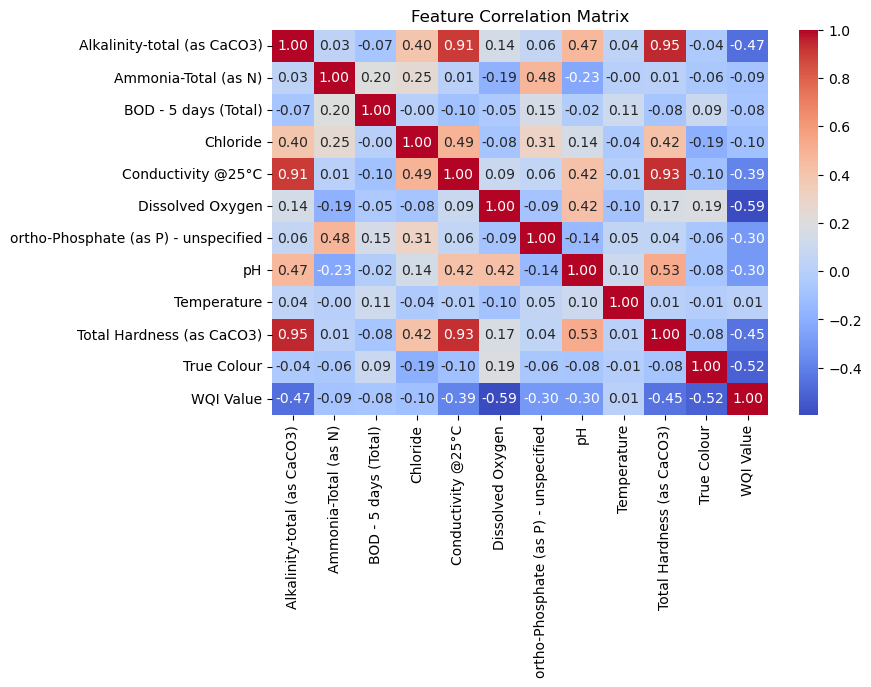

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Get correlation of WQI with other features
wqi_corr = corr_matrix["WQI Value"].abs().sort_values(ascending=False)
print(wqi_corr)

# Visualize correlation as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [16]:
corr_threshold = 0.5  # Define threshold
selected_features = wqi_corr[wqi_corr > corr_threshold].index.tolist()
selected_features.remove("WQI Value")  # Exclude WQI itself
print("Selected Features for Prediction:", selected_features)

Selected Features for Prediction: ['Dissolved Oxygen', 'True Colour']



📊 Visualizing Train/Test Split

📊 Visualizing Scaling Effect

🔍 Training Models with Default Parameters

📊 Training: XGBoost with Default Parameters
Using unscaled data for XGBoost
XGBoost (Default, Unscaled) - RMSE: 3.3309, R2: 0.7882
Default model trained in 0.13 seconds
Saved default XGBoost to models\XGBoost_default.joblib

📊 Training: Random Forest with Default Parameters
Using unscaled data for Random Forest
Random Forest (Default, Unscaled) - RMSE: 2.8944, R2: 0.8401
Default model trained in 0.77 seconds
Saved default Random Forest to models\Random Forest_default.joblib

📊 Training: Gradient Boosting with Default Parameters
Using unscaled data for Gradient Boosting
Gradient Boosting (Default, Unscaled) - RMSE: 4.1052, R2: 0.6783
Default model trained in 0.24 seconds
Saved default Gradient Boosting to models\Gradient Boosting_default.joblib

📊 Training: Decision Tree with Default Parameters
Using unscaled data for Decision Tree
Decision Tree (Default, Unscaled) - RMSE: 2.9647, R

c:\Users\dnish\anaconda3\envs\Juju\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-Layer Perceptron (Default, Scaled) - RMSE: 4.4226, R2: 0.6266
Default model trained in 1.60 seconds
Saved default Multi-Layer Perceptron to models\Multi-Layer Perceptron_default.joblib

🔍 Training Models with GridSearch and Measuring Performance

📊 Training: XGBoost with GridSearch
Using unscaled data for XGBoost
GridSearch completed in 6.19 seconds
Best params: {'learning_rate': 0.1, 'n_estimators': 1000}
XGBoost (Optimized, Unscaled) - RMSE: 2.8502, R2: 0.8449

Retraining XGBoost with best parameters to measure training time
XGBoost (Optimized fresh retrain) - RMSE: 2.8541, R2: 0.8445
Optimized model trained in 0.41 seconds
Saved optimized XGBoost to models\XGBoost_optimized.joblib

📊 Training: Random Forest with GridSearch
Using unscaled data for Random Forest
GridSearch completed in 27.80 seconds
Best params: {'max_depth': 30, 'n_estimators': 1000}
Random Forest (Optimized, Unscaled) - RMSE: 2.8594, R2: 0.8439

Retraining Random Forest with best parameters to measure training

C:\Users\dnish\AppData\Roaming\Python\Python313\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearch completed in 61.13 seconds
Best params: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.9}
Gradient Boosting (Optimized, Unscaled) - RMSE: 3.0484, R2: 0.8226

Retraining Gradient Boosting with best parameters to measure training time
Gradient Boosting (Optimized fresh retrain) - RMSE: 2.8086, R2: 0.8494
Optimized model trained in 1.46 seconds
Saved optimized Gradient Boosting to models\Gradient Boosting_optimized.joblib

📊 Training: Decision Tree with GridSearch
Using unscaled data for Decision Tree
GridSearch completed in 0.13 seconds
Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree (Optimized, Unscaled) - RMSE: 2.9647, R2: 0.8322

Retraining Decision Tree with best parameters to measure training time
Decision Tree (Optimized fresh retrain) - RMSE: 2.9647, R2: 0.8322
Optimized model trained in 0.01 seconds
Saved optimized Decision Tree to models\Decision Tree_optimized.joblib

📊 

c:\Users\dnish\anaconda3\envs\Juju\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-Layer Perceptron (Optimized fresh retrain) - RMSE: 4.4268, R2: 0.6259
Optimized model trained in 1.90 seconds
Saved optimized Multi-Layer Perceptron to models\Multi-Layer Perceptron_optimized.joblib

📋 Combined Results Summary:
                    Model Parameters      RMSE        R2  Training Time (s)
3           Decision Tree    Default  2.964720  0.832192           0.010049
3           Decision Tree  Optimized  2.964720  0.832192           0.010640
2       Gradient Boosting    Default  4.105181  0.678257           0.238399
2       Gradient Boosting  Optimized  2.808583  0.849402           1.460940
5  Multi-Layer Perceptron    Default  4.422645  0.626570           1.598261
5  Multi-Layer Perceptron  Optimized  4.426828  0.625864           1.898044
1           Random Forest    Default  2.894424  0.840056           0.772631
1           Random Forest  Optimized  2.859443  0.843898           7.461158
4  Support Vector Machine    Default  4.389513  0.632145           0.808209
4  Sup

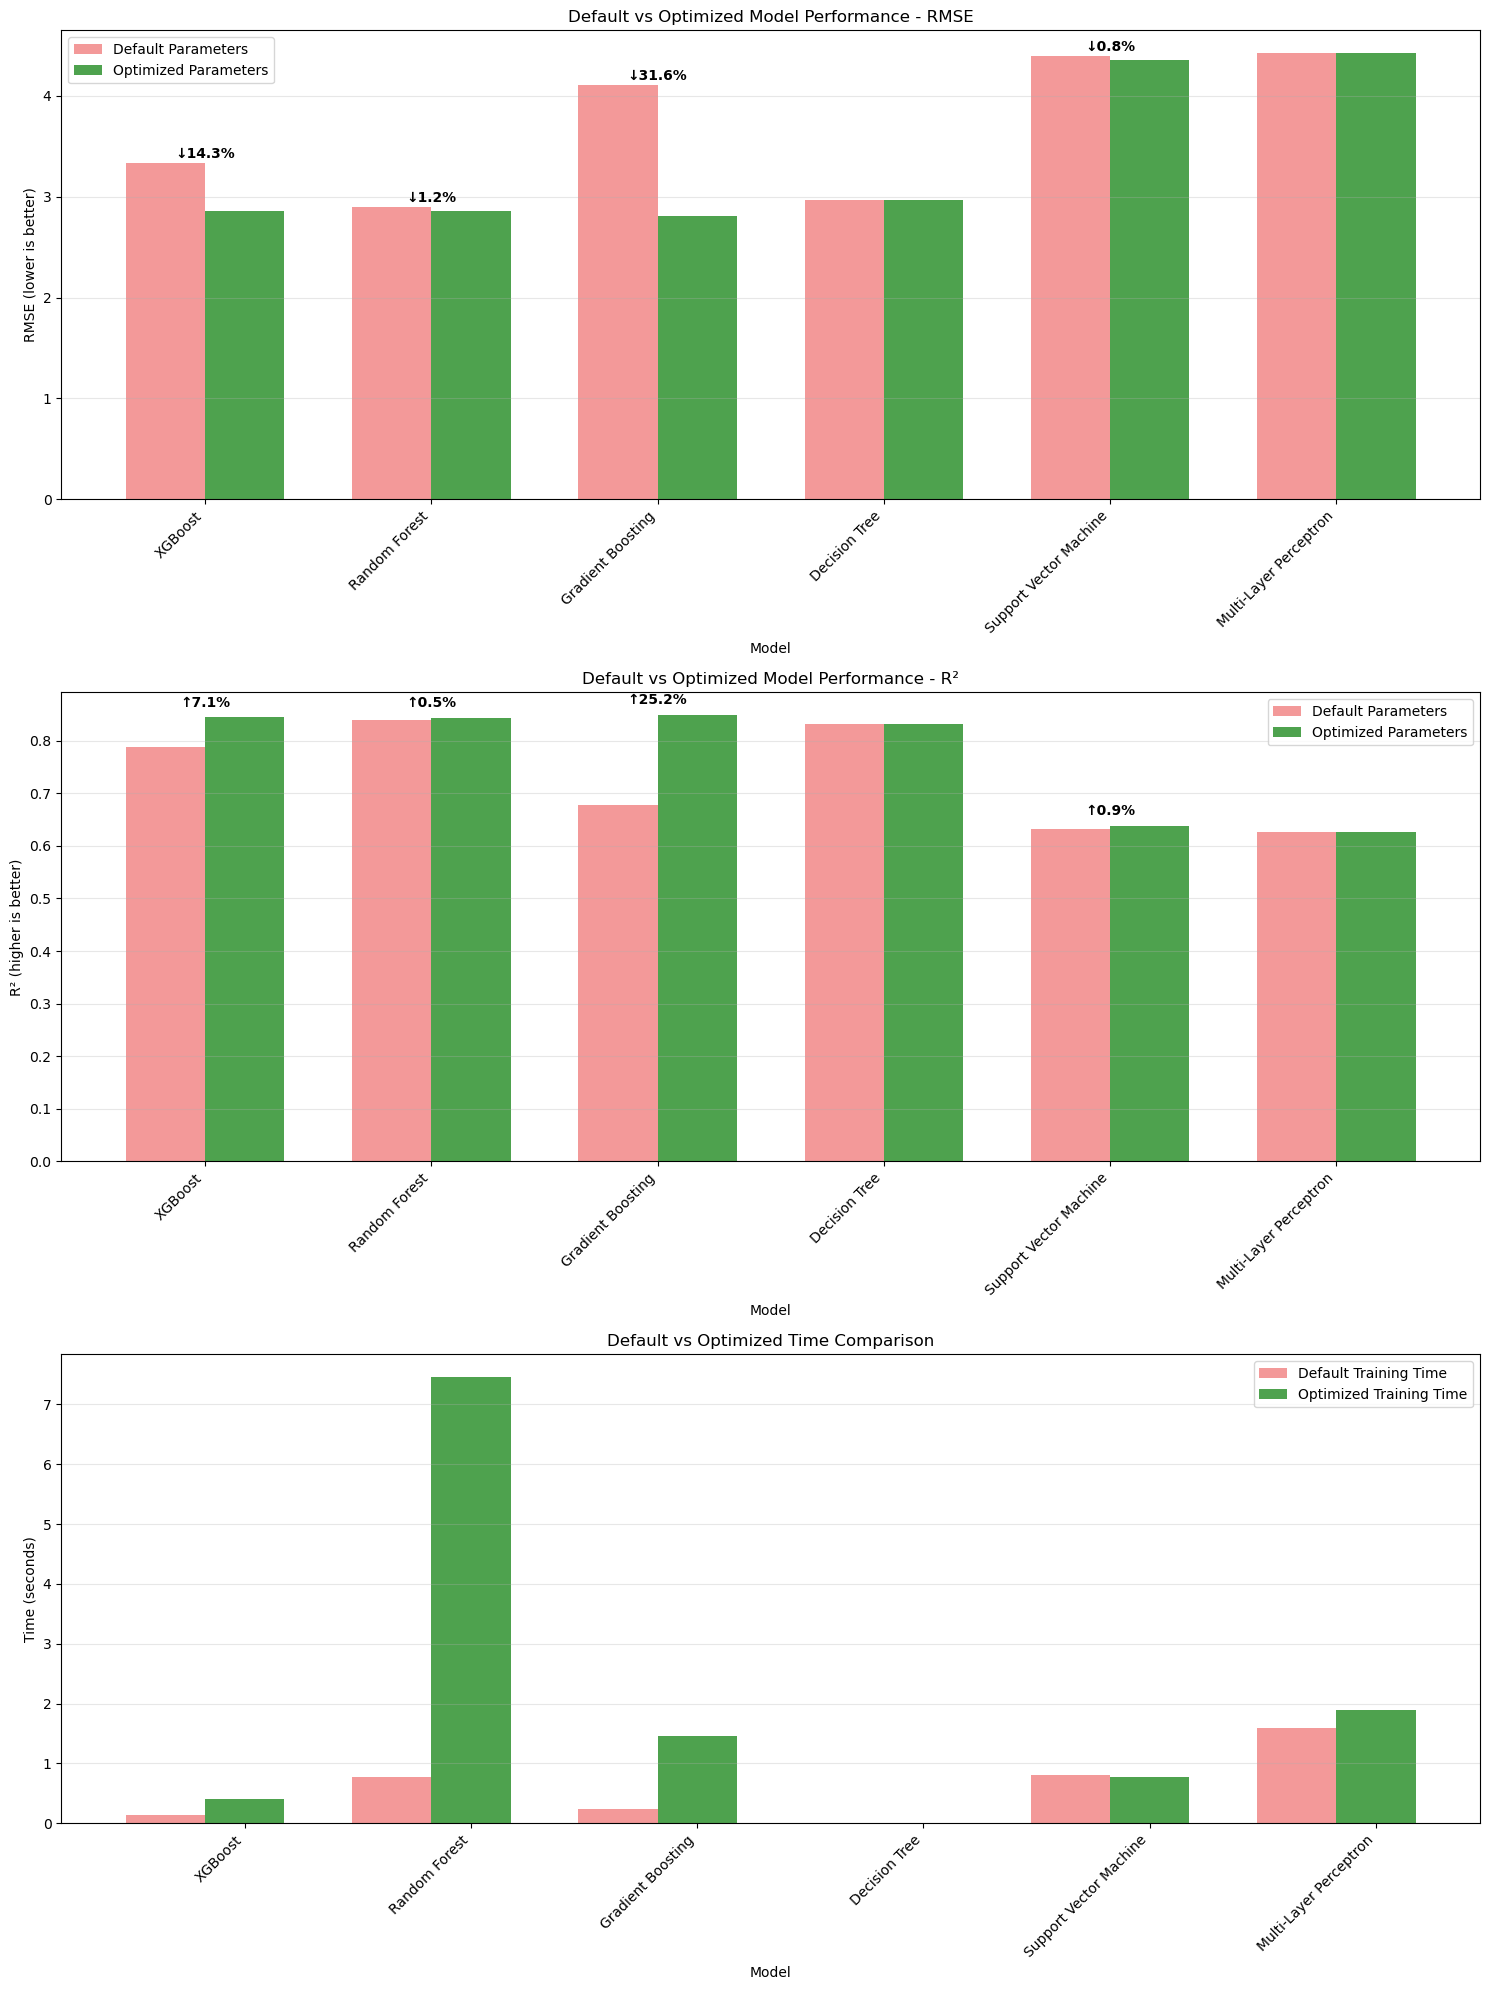


🥈 Best Default Model: Random Forest - R²: 0.8401, RMSE: 2.8944

🥇 Best Optimized Model: Gradient Boosting - R²: 0.8494, RMSE: 2.8086
Saved best overall model (Gradient Boosting) to models\best_model.joblib
Saved scaler to models\scaler.joblib
Saved best model configuration to models\best_model_config.joblib
Saved improvement summary to models\improvement_summary.joblib


In [18]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import pandas as pd
import numpy as np
import time
from inspect import signature  # Import signature for parameter checking

# -----------------------------------------------
# Helper functions
# -----------------------------------------------
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - RMSE: {rmse:.4f}, R2: {r2:.4f}")
    return model, rmse, r2

# -----------------------------------------------
# Setup output directory
# -----------------------------------------------
models_dir = "models"
os.makedirs(models_dir, exist_ok=True)

# -----------------------------------------------
# Prepare Data
# -----------------------------------------------
X = df[selected_features]
y = df["WQI Value"]

# Use the same random state for consistent comparison
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------------
# Visualize Train/Test Split
# -----------------------------------------------
print("\n📊 Visualizing Train/Test Split")
plt.figure(figsize=(12, 6))

# Histogram of target variable in train and test sets
plt.subplot(1, 2, 1)
sns.histplot(y_train, color='blue', alpha=0.6, label='Train', kde=True)
sns.histplot(y_test, color='red', alpha=0.6, label='Test', kde=True)
plt.title('Target Distribution: Train vs Test')
plt.xlabel('WQI Value')
plt.ylabel('Frequency')
plt.legend()

# Scatterplot of first two features colored by train/test split
plt.subplot(1, 2, 2)
if X.shape[1] >= 2:
    features = X.columns[:2]  # First two features
    combined_data = pd.DataFrame({
        features[0]: pd.concat([X_train[features[0]], X_test[features[0]]]),
        features[1]: pd.concat([X_train[features[1]], X_test[features[1]]]),
        'Set': ['Train'] * len(X_train) + ['Test'] * len(X_test)
    })
    
    sns.scatterplot(
        data=combined_data, 
        x=features[0], 
        y=features[1], 
        hue='Set',
        palette={'Train': 'blue', 'Test': 'red'},
        alpha=0.6
    )
    plt.title(f'Train/Test Distribution in Feature Space\n({features[0]} vs {features[1]})')
else:
    plt.text(0.5, 0.5, "Not enough features for 2D visualization", 
             horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.savefig(os.path.join(models_dir, 'train_test_split_visualization.png'))
plt.close()

# -----------------------------------------------
# Visualize Standard Scaling Effect
# -----------------------------------------------
print("\n📊 Visualizing Scaling Effect")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a sample of features for visualization
scaled_features_sample = scaler.fit_transform(X.iloc[:100])
scaled_df_sample = pd.DataFrame(scaled_features_sample, columns=X.columns)

# Visualization: Boxplots before and after scaling
plt.figure(figsize=(18, 8))

# Before scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=X.iloc[:100], palette="Blues")
plt.title("Feature Distribution Before Scaling")
plt.ylabel('Original Value Ranges')
plt.xticks(rotation=90)

# After scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=scaled_df_sample, palette="Greens")
plt.title("Feature Distribution After Scaling (StandardScaler)")
plt.ylabel('Scaled Value Ranges (Standardized)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig(os.path.join(models_dir, 'scaling_comparison_boxplots.png'))
plt.close()

# Convert back to dataframes to keep column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# -----------------------------------------------
# Define Models and Parameters
# -----------------------------------------------
# Define which models typically benefit from scaling
# Tree-based models generally don't benefit from scaling
scaling_needed = {
    "XGBoost": False,
    "Random Forest": False,
    "Gradient Boosting": False,
    "Decision Tree": False,
    "Support Vector Machine": True,  # SVM benefits greatly from scaling
    "Multi-Layer Perceptron": True   # Neural networks benefit from scaling
}

# Define the default models with default parameters
default_models = {
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "Multi-Layer Perceptron": MLPRegressor(random_state=42)
}

# Define the base models for hyperparameter tuning
base_models = {
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42, gamma=1e-3),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True, warm_start=True),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, validation_fraction=0.1, n_iter_no_change=10),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Machine": SVR(tol=1e-3, max_iter=10000),
    "Multi-Layer Perceptron": MLPRegressor(max_iter=1000, random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10, tol=1e-4, alpha=1e-4)
}

# Parameter grids for optimization
param_grids = {
    "XGBoost": {
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'n_estimators': [100, 300, 500, 700, 1000]
    },
    "Random Forest": {
        'n_estimators': [100, 300, 500, 700, 1000],
        'max_depth': [None, 10, 20, 30],
    },
    "Gradient Boosting": {
        'n_estimators': [100, 300, 500, 700, 1000],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5],
        'subsample': [0.8, 0.9, 1.0]
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Support Vector Machine": {
        'kernel': ['linear', 'poly', 'rbf'],
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 0.5, 1.0],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1],
        'degree': [2, 3, 4]  # only used with poly kernel
    },
    "Multi-Layer Perceptron": {
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
}

# -----------------------------------------------
# Train Default Models
# -----------------------------------------------
print("\n🔍 Training Models with Default Parameters")

default_results = []

for model_name, default_model in default_models.items():
    print(f"\n📊 Training: {model_name} with Default Parameters")
    
    # Choose appropriate dataset based on whether scaling is needed
    if scaling_needed[model_name]:
        print(f"Applying scaling for {model_name} as it benefits from normalized features")
        X_train_use = X_train_scaled_df
        X_test_use = X_test_scaled_df
        scaled_status = "Scaled"
    else:
        print(f"Using unscaled data for {model_name}")
        X_train_use = X_train
        X_test_use = X_test
        scaled_status = "Unscaled"
    
    # Train with default parameters and measure time
    train_start_time = time.time()
    default_model.fit(X_train_use, y_train)
    training_time = time.time() - train_start_time
    
    # Evaluate on test set
    _, rmse, r2 = evaluate_model(default_model, X_test_use, y_test, f"{model_name} (Default, {scaled_status})")
    
    default_results.append({
        'Model': model_name,
        'RMSE': rmse,
        'R2': r2,
        'Training Time (s)': training_time,
        'Scaled': scaling_needed[model_name],
        'Parameters': 'Default'
    })
    
    print(f"Default model trained in {training_time:.2f} seconds")
    
    # Save the default model
    model_path = os.path.join(models_dir, f"{model_name}_default.joblib")
    joblib.dump(default_model, model_path)
    print(f"Saved default {model_name} to {model_path}")

# -----------------------------------------------
# Train Models with Selective Scaling and Hyperparameter Tuning
# -----------------------------------------------
print("\n🔍 Training Models with GridSearch and Measuring Performance")

optimized_results = []
best_models = {}

for model_name, base_model in base_models.items():
    print(f"\n📊 Training: {model_name} with GridSearch")
    
    # Choose appropriate dataset based on whether scaling is needed
    if scaling_needed[model_name]:
        print(f"Applying scaling for {model_name} as it benefits from normalized features")
        X_train_use = X_train_scaled_df
        X_test_use = X_test_scaled_df
        scaled_status = "Scaled"
    else:
        print(f"Using unscaled data for {model_name}")
        X_train_use = X_train
        X_test_use = X_test
        scaled_status = "Unscaled"
    
    # Train with GridSearch and measure time
    grid_start_time = time.time()
    grid = GridSearchCV(base_model, param_grids[model_name], cv=3, scoring='r2', n_jobs=-1)
    grid.fit(X_train_use, y_train)
    grid_time = time.time() - grid_start_time
    
    best_model = grid.best_estimator_
    best_models[model_name] = {
        'model': best_model,
        'needs_scaling': scaling_needed[model_name]
    }
    
    print(f"GridSearch completed in {grid_time:.2f} seconds")
    print(f"Best params: {grid.best_params_}")
    
    # Evaluate on test set
    _, rmse, r2 = evaluate_model(best_model, X_test_use, y_test, f"{model_name} (Optimized, {scaled_status})")
    
    # Now retrain the model with best parameters and measure training time
    print(f"\nRetraining {model_name} with best parameters to measure training time")
    
    # Create a fresh model with best parameters, handling the random_state correctly
    best_params = grid.best_params_.copy()  # Create a copy to avoid modifying the original
    best_model_class = grid.best_estimator_.__class__
    
    # Check if the model's constructor accepts random_state as a parameter
    model_params = signature(best_model_class.__init__).parameters
    
    if 'random_state' in model_params:
        # Only add random_state if the model accepts it
        best_model_fresh = best_model_class(**best_params, random_state=42)
    else:
        # Otherwise just use the best parameters without random_state
        best_model_fresh = best_model_class(**best_params)
    
    train_start_time = time.time()
    best_model_fresh.fit(X_train_use, y_train)
    training_time = time.time() - train_start_time
    
    # Evaluate the fresh model
    _, fresh_rmse, fresh_r2 = evaluate_model(best_model_fresh, X_test_use, y_test, f"{model_name} (Optimized fresh retrain)")
    
    optimized_results.append({
        'Model': model_name,
        'RMSE': fresh_rmse,
        'R2': fresh_r2,
        'Training Time (s)': training_time,
        'GridSearch Time (s)': grid_time,
        'Scaled': scaling_needed[model_name],
        'Parameters': 'Optimized'
    })
    
    print(f"Optimized model trained in {training_time:.2f} seconds")
    
    # Save the best model
    model_path = os.path.join(models_dir, f"{model_name}_optimized.joblib")
    joblib.dump(best_model_fresh, model_path)
    print(f"Saved optimized {model_name} to {model_path}")
    
    # Save the grid search results
    grid_results_path = os.path.join(models_dir, f"{model_name}_grid_results.joblib")
    grid_results = {
        'best_params': grid.best_params_,
        'cv_results': grid.cv_results_,
        'used_scaling': scaling_needed[model_name],
        'grid_search_time': grid_time,
        'training_time': training_time
    }
    joblib.dump(grid_results, grid_results_path)

# -----------------------------------------------
# Combine Default and Optimized Results
# -----------------------------------------------
# Add parameter type to distinguish between default and optimized
default_results_df = pd.DataFrame(default_results)
optimized_results_df = pd.DataFrame(optimized_results)

# Combine the results
combined_results_df = pd.concat([default_results_df, optimized_results_df])

# -----------------------------------------------
# Visualize Default vs Optimized Results
# -----------------------------------------------
print("\n📋 Combined Results Summary:")
# Sort by model name and then by parameters (Default then Optimized)
display_df = combined_results_df.sort_values(by=['Model', 'Parameters'])
print(display_df[['Model', 'Parameters', 'RMSE', 'R2', 'Training Time (s)']])

# Calculate improvement for each model
improvement_data = []
models = default_results_df['Model'].unique()

for model in models:
    default_r2 = default_results_df[default_results_df['Model'] == model]['R2'].values[0]
    default_rmse = default_results_df[default_results_df['Model'] == model]['RMSE'].values[0]
    
    optimized_r2 = optimized_results_df[optimized_results_df['Model'] == model]['R2'].values[0]
    optimized_rmse = optimized_results_df[optimized_results_df['Model'] == model]['RMSE'].values[0]
    
    r2_improvement = optimized_r2 - default_r2
    r2_relative_improvement = (r2_improvement / abs(default_r2)) * 100 if default_r2 != 0 else float('inf')
    
    rmse_improvement = default_rmse - optimized_rmse  # Lower RMSE is better
    rmse_relative_improvement = (rmse_improvement / default_rmse) * 100
    
    improvement_data.append({
        'Model': model,
        'R2 Improvement': r2_improvement,
        'R2 Relative Improvement (%)': r2_relative_improvement,
        'RMSE Improvement': rmse_improvement,
        'RMSE Relative Improvement (%)': rmse_relative_improvement
    })

improvement_df = pd.DataFrame(improvement_data)
print("\n📈 Improvement Analysis:")
print(improvement_df)

# -----------------------------------------------
# Plot Default vs Optimized Performance
# -----------------------------------------------
# Set up the plot
plt.figure(figsize=(15, 20))

# Get unique models
models = combined_results_df['Model'].unique()
x = np.arange(len(models))
width = 0.35

# Plot RMSE (lower is better)
plt.subplot(3, 1, 1)
default_rmse = [default_results_df[default_results_df['Model'] == model]['RMSE'].values[0] for model in models]
optimized_rmse = [optimized_results_df[optimized_results_df['Model'] == model]['RMSE'].values[0] for model in models]

plt.bar(x - width/2, default_rmse, width, label='Default Parameters', color='lightcoral', alpha=0.8)
plt.bar(x + width/2, optimized_rmse, width, label='Optimized Parameters', color='forestgreen', alpha=0.8)

# Add improvement annotations
for i, model in enumerate(models):
    improvement = default_rmse[i] - optimized_rmse[i]
    percent = (improvement / default_rmse[i]) * 100
    if improvement > 0:  # Only show positive improvements (lower RMSE is better)
        plt.text(i, max(default_rmse[i], optimized_rmse[i]) + 0.05, 
                 f"↓{percent:.1f}%", ha='center', fontweight='bold')

plt.xlabel('Model')
plt.ylabel('RMSE (lower is better)')
plt.title('Default vs Optimized Model Performance - RMSE')
plt.xticks(x, models, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Plot R2 (higher is better)
plt.subplot(3, 1, 2)
default_r2 = [default_results_df[default_results_df['Model'] == model]['R2'].values[0] for model in models]
optimized_r2 = [optimized_results_df[optimized_results_df['Model'] == model]['R2'].values[0] for model in models]

plt.bar(x - width/2, default_r2, width, label='Default Parameters', color='lightcoral', alpha=0.8)
plt.bar(x + width/2, optimized_r2, width, label='Optimized Parameters', color='forestgreen', alpha=0.8)

# Add improvement annotations
for i, model in enumerate(models):
    improvement = optimized_r2[i] - default_r2[i]
    # Calculate percentage increase - handle case where default R2 is 0 or negative
    if default_r2[i] > 0:
        percent = (improvement / default_r2[i]) * 100
        if improvement > 0:  # Only show positive improvements
            plt.text(i, max(default_r2[i], optimized_r2[i]) + 0.02, 
                     f"↑{percent:.1f}%", ha='center', fontweight='bold')
    elif improvement > 0:
        plt.text(i, max(default_r2[i], optimized_r2[i]) + 0.02, 
                 f"↑{improvement:.2f}", ha='center', fontweight='bold')

plt.xlabel('Model')
plt.ylabel('R² (higher is better)')
plt.title('Default vs Optimized Model Performance - R²')
plt.xticks(x, models, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Plot Training Time
plt.subplot(3, 1, 3)
default_time = [default_results_df[default_results_df['Model'] == model]['Training Time (s)'].values[0] for model in models]
optimized_time = [optimized_results_df[optimized_results_df['Model'] == model]['Training Time (s)'].values[0] for model in models]

plt.bar(x - width, default_time, width, label='Default Training Time', color='lightcoral', alpha=0.8)
plt.bar(x, optimized_time, width, label='Optimized Training Time', color='forestgreen', alpha=0.8)

plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.title('Default vs Optimized Time Comparison')
plt.xticks(x, models, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(models_dir, 'default_vs_optimized_comparison.png'))
plt.show()

# -----------------------------------------------
# Find Best Models
# -----------------------------------------------
# Find best default model based on R2
best_default_idx = default_results_df['R2'].idxmax()
best_default_model = default_results_df.iloc[best_default_idx]['Model']

# Find best optimized model based on R2
best_optimized_idx = optimized_results_df['R2'].idxmax()
best_optimized_model = optimized_results_df.iloc[best_optimized_idx]['Model']

print(f"\n🥈 Best Default Model: {best_default_model} "
      f"- R²: {default_results_df.iloc[best_default_idx]['R2']:.4f}, "
      f"RMSE: {default_results_df.iloc[best_default_idx]['RMSE']:.4f}")

print(f"\n🥇 Best Optimized Model: {best_optimized_model} "
      f"- R²: {optimized_results_df.iloc[best_optimized_idx]['R2']:.4f}, "
      f"RMSE: {optimized_results_df.iloc[best_optimized_idx]['RMSE']:.4f}")

# -----------------------------------------------
# Save the Best Models
# -----------------------------------------------
# Save the best overall model (optimized)
best_model_info = best_models[best_optimized_model]
best_model = best_model_info['model']
best_model_needs_scaling = best_model_info['needs_scaling']

best_model_path = os.path.join(models_dir, "best_model.joblib")
joblib.dump(best_model, best_model_path)
print(f"Saved best overall model ({best_optimized_model}) to {best_model_path}")

# Save the scaler for preprocessing new data with models that need it
scaler_path = os.path.join(models_dir, "scaler.joblib")
joblib.dump(scaler, scaler_path)
print(f"Saved scaler to {scaler_path}")

# Create a config file that indicates whether scaling is needed for the best model
best_model_config = {
    'model_name': best_optimized_model,
    'needs_scaling': best_model_needs_scaling,
    'r2_score': optimized_results_df.iloc[best_optimized_idx]['R2'],
    'rmse': optimized_results_df.iloc[best_optimized_idx]['RMSE'],
    'training_time': optimized_results_df.iloc[best_optimized_idx]['Training Time (s)'],
    'default_vs_optimized_improvement': {
        'r2_improvement': improvement_df[improvement_df['Model'] == best_optimized_model]['R2 Improvement'].values[0],
        'rmse_improvement': improvement_df[improvement_df['Model'] == best_optimized_model]['RMSE Improvement'].values[0],
        'r2_relative_improvement_pct': improvement_df[improvement_df['Model'] == best_optimized_model]['R2 Relative Improvement (%)'].values[0],
        'rmse_relative_improvement_pct': improvement_df[improvement_df['Model'] == best_optimized_model]['RMSE Relative Improvement (%)'].values[0]
    }
}

config_path = os.path.join(models_dir, "best_model_config.joblib")
joblib.dump(best_model_config, config_path)
print(f"Saved best model configuration to {config_path}")

# Create a summary report of model improvements
improvement_report = {
    'avg_r2_improvement': improvement_df['R2 Improvement'].mean(),
    'avg_rmse_improvement': improvement_df['RMSE Improvement'].mean(),
    'max_r2_improvement': improvement_df['R2 Improvement'].max(),
    'max_rmse_improvement': improvement_df['RMSE Improvement'].max(),
    'best_r2_improvement_model': improvement_df.loc[improvement_df['R2 Improvement'].idxmax()]['Model'],
    'best_rmse_improvement_model': improvement_df.loc[improvement_df['RMSE Improvement'].idxmax()]['Model']
}

improvement_path = os.path.join(models_dir, "improvement_summary.joblib")
joblib.dump(improvement_report, improvement_path)
print(f"Saved improvement summary to {improvement_path}")